# This script contains the followings:
- Import libraries & load dataset
- Prep regression
- Regression
 

# Import libraries & load dataset

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import json
import folium
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define full absolute paths
path = r'/Users/macbook/Dropbox/Mac/Documents/Pro/Data Analyst/Course_Career foundry/A6_Data immersion/02_data'
file_path = os.path.join(path,'prepared_data','transactions_V3')

# Load file from pickle
df = pd.read_pickle(file_path)

# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [4]:
df.shape

(7564587, 16)

# Test variables with scatter plot


In [5]:
df.columns

Index(['id_transaction', 'date_transaction', 'year', 'price', 'price_m2',
       'id_city', 'city', 'postcode', 'adresse', 'departement',
       'building_type', 'vefa', 'n_rooms', 'living_area', 'latitude',
       'longitude'],
      dtype='object')

Text(0.5, 1.0, 'Scatter Plot of Price vs. Living Area')

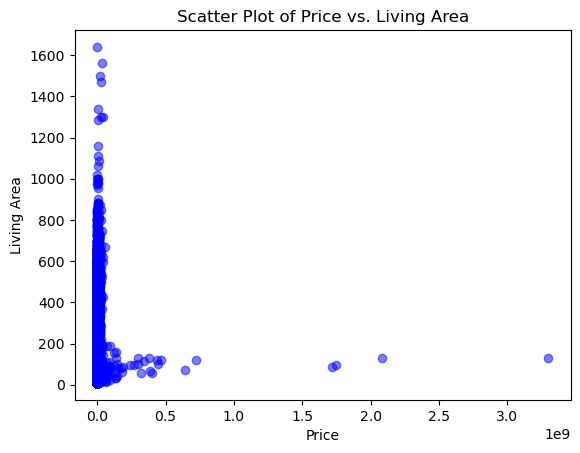

In [6]:
# Create the scatter plot
plt.scatter(df['price'], df['living_area'], alpha=0.5, c='b', marker='o', label='Price vs. Living Area')

# Set axis labels and a title
plt.xlabel('Price')
plt.ylabel('Living Area')
plt.title('Scatter Plot of Price vs. Living Area')


### NOTE: Presence of outliers
we have clear outliers with very high surface (above 200m2) and a low price

# Data wrangling

In [7]:
round(df.describe(),2)

,id_transaction,date_transaction,year,price,price_m2,id_city,postcode,n_rooms,living_area,latitude,longitude
count,7564587.00,7564587,7564587.00,7.564587e+06,7564587.00,7564587.00,7564587.00,7564587.00,7564587.00,7564587.00,7564587.00
mean,6723761.90,2018-10-26 02:40:34.348686080,2018.30,2.279014e+05,3040.51,208.55,53297.37,3.54,81.92,46.32,2.38
min,2.00,2014-01-01 00:00:00,2014.00,4.500000e+03,500.00,1.00,1000.00,0.00,9.00,-21.39,-63.15
25%,3304515.50,2016-10-07 00:00:00,2016.00,1.100000e+05,1529.41,71.00,31300.00,2.00,53.00,44.76,0.60
50%,6693068.00,2018-12-14 00:00:00,2018.00,1.700000e+05,2343.75,166.00,56410.00,3.00,76.00,47.24,2.38
75%,10173482.50,2020-12-24 00:00:00,2020.00,2.626000e+05,3602.56,300.00,77100.00,4.00,101.00,48.84,4.61
max,13067339.00,2022-12-31 00:00:00,2022.00,3.300000e+09,25781250.00,909.00,97490.00,112.00,1640.00,51.08,55.83
std,3897417.93,NaN,2.49,1.811323e+06,17133.97,172.61,27677.07,1.53,42.38,5.86,6.23


In [8]:
min_threshold, max_threshold = df.living_area.quantile([0.0001,0.999])
min_threshold, max_threshold

(9.0, 344.0)

In [9]:
df[df.living_area > max_threshold]

,id_transaction,date_transaction,year,price,price_m2,id_city,city,postcode,adresse,departement,building_type,vefa,n_rooms,living_area,latitude,longitude
603,330558,2014-02-20,2014,244000.0,666.666667,199,JUJURIEUX,1640,5 RUE C.J. BONNET,01,Maison,False,10,366,46.041089,5.409447
879,332216,2014-02-28,2014,883700.0,1767.400000,73,CEYZERIEU,1350,5368 SENOY,01,Maison,False,13,500,45.832868,5.719257
1336,326278,2014-04-07,2014,425000.0,1118.421053,334,SAINT-ANDRE-D HUIRIAT,1290,5092 BOIS PLAN,01,Maison,False,10,380,46.210788,4.896526
1981,334555,2014-05-23,2014,400000.0,961.538462,33,BELLEGARDE-SUR-VALSERINE,1200,1026 RUE DE MUSINENS,01,Maison,False,10,416,46.119069,5.818842
2220,328438,2014-06-06,2014,494625.0,1413.214286,262,MONTLUEL,1120,15 PL DE LA VILLE HAUTE,01,Maison,False,7,350,45.851886,5.051593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776043,13021040,2015-11-19,2015,783000.0,1957.500000,16,SAINT PIERRE,97432,3B CHE PALAMA,974,Maison,False,15,400,-21.279380,55.474284
7789006,12852055,2018-09-27,2018,300000.0,789.473684,22,LE TAMPON,97418,2A CHEM DES CAPUCINES,974,Maison,False,7,380,-21.234416,55.522654
7790902,12789307,2019-02-15,2019,781700.0,2171.388889,11,SAINT DENIS,97417,1 RTE DES EUCALYPTUS LA MTA,974,Maison,False,7,360,-20.886011,55.434777
7794067,12794398,2019-09-26,2019,758918.7,1887.857463,16,SAINT PIERRE,97410,2C ALL DES DAHLIAS,974,Maison,False,8,402,-21.334153,55.488022


In [10]:
df2 = df[(df.living_area > min_threshold) & (df.living_area < max_threshold)]
round(df2.describe())

,id_transaction,date_transaction,year,price,price_m2,id_city,postcode,n_rooms,living_area,latitude,longitude
count,7554938.0,7554938,7554938.0,7.554938e+06,7554938.0,7554938.0,7554938.0,7554938.0,7554938.0,7554938.0,7554938.0
mean,6723674.0,2018-10-26 00:15:49.916043264,2018.0,2.266070e+05,3038.0,209.0,53297.0,4.0,82.0,46.0,2.0
min,2.0,2014-01-01 00:00:00,2014.0,5.000000e+03,500.0,1.0,1000.0,0.0,10.0,-21.0,-63.0
25%,3304599.0,2016-10-07 00:00:00,2016.0,1.100000e+05,1529.0,71.0,31300.0,2.0,53.0,45.0,1.0
50%,6692540.0,2018-12-14 00:00:00,2018.0,1.700000e+05,2344.0,166.0,56400.0,3.0,76.0,47.0,2.0
75%,10173484.0,2020-12-24 00:00:00,2020.0,2.620000e+05,3601.0,300.0,77100.0,4.0,101.0,49.0,5.0
max,13067339.0,2022-12-31 00:00:00,2022.0,3.300000e+09,25781250.0,909.0,97490.0,112.0,343.0,51.0,56.0
std,3897486.0,NaN,2.0,1.809684e+06,17142.0,173.0,27678.0,2.0,41.0,6.0,6.0


### we do the same for price per m2 which has a max of 25 781 250 € 

In [11]:
df2.shape

(7554938, 16)

In [12]:
min_threshold_price_m2, max_threshold_price_m2 = df2.price_m2.quantile([0.01,0.995])
min_threshold_price_m2, max_threshold_price_m2

(576.9230769230769, 14100.0)

In [13]:
df3 = df[(df.price_m2 > min_threshold_price_m2) & (df.price_m2 < max_threshold_price_m2)]
round(df3.describe())

,id_transaction,date_transaction,year,price,price_m2,id_city,postcode,n_rooms,living_area,latitude,longitude
count,7449536.0,7449536,7449536.0,7449536.0,7449536.0,7449536.0,7449536.0,7449536.0,7449536.0,7449536.0,7449536.0
mean,6723584.0,2018-10-24 23:29:56.644301056,2018.0,219058.0,2925.0,209.0,53295.0,4.0,82.0,46.0,2.0
min,2.0,2014-01-01 00:00:00,2014.0,5500.0,577.0,1.0,1000.0,0.0,9.0,-21.0,-63.0
25%,3306694.0,2016-10-06 00:00:00,2016.0,112000.0,1548.0,71.0,31300.0,2.0,53.0,45.0,1.0
50%,6686340.0,2018-12-14 00:00:00,2018.0,171000.0,2353.0,167.0,56400.0,3.0,76.0,47.0,2.0
75%,10182264.0,2020-12-23 00:00:00,2020.0,262000.0,3594.0,300.0,77127.0,4.0,101.0,49.0,5.0
max,13067339.0,2022-12-31 00:00:00,2022.0,17865830.0,14100.0,909.0,97490.0,112.0,1640.0,51.0,56.0
std,3899116.0,NaN,2.0,191507.0,2079.0,173.0,27687.0,2.0,42.0,6.0,6.0


Text(0.5, 1.0, 'Scatter Plot of Price vs. Living Area')

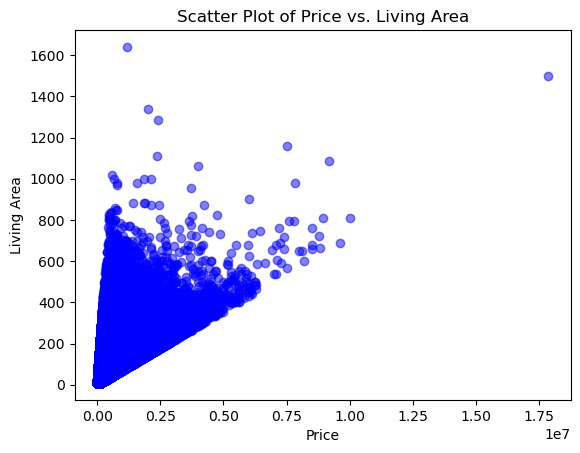

In [14]:
# Create the scatter plot price / living area
plt.scatter(df3['price'], df3['living_area'], alpha=0.5, c='b', marker='o', label='Price vs. Living Area')

# Set axis labels and a title
plt.xlabel('Price')
plt.ylabel('Living Area')
plt.title('Scatter Plot of Price vs. Living Area')

### NOTE: Observations
relative positive correlation. no result a certain threshold due to our outlier cleaning proces

Text(0.5, 1.0, 'Scatter Plot of number of rooms vs. Living Area')

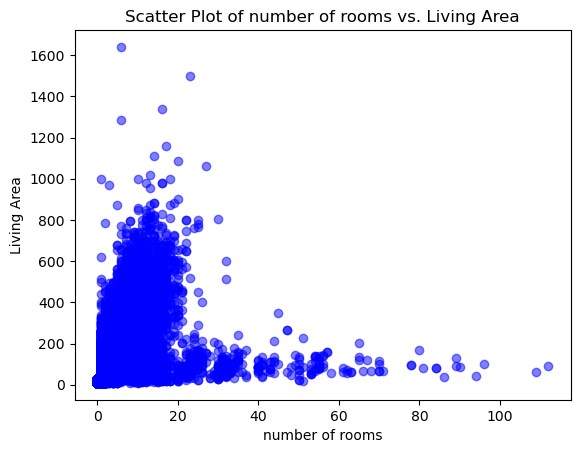

In [14]:
# Create the scatter plot price_m2 
plt.scatter(df3['n_rooms'], df3['living_area'], alpha=0.5, c='b', marker='o', label='number of rooms vs. Living Area')

# Set axis labels and a title
plt.xlabel('number of rooms')
plt.ylabel('Living Area')
plt.title('Scatter Plot of number of rooms vs. Living Area')

Text(0.5, 1.0, 'Scatter Plot of number of rooms vs. price_m2')

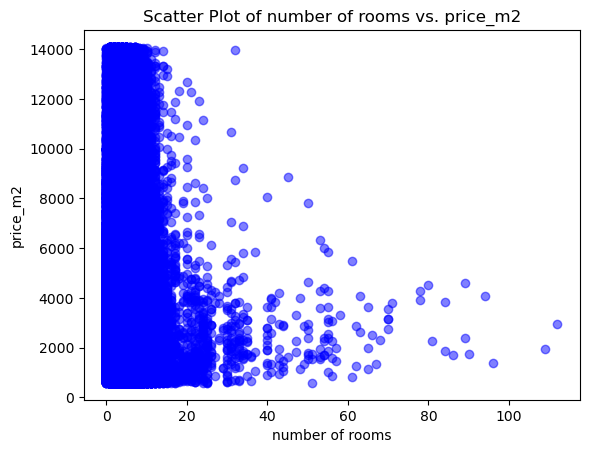

In [15]:
# Create the scatter plot price_m2 
plt.scatter(df3['n_rooms'], df3['price_m2'], alpha=0.5, c='b', marker='o', label='number of rooms vs. price_m2')

# Set axis labels and a title
plt.xlabel('number of rooms')
plt.ylabel('price_m2')
plt.title('Scatter Plot of number of rooms vs. price_m2')

### NOTE: observations
This plot shows that the majority of properties have fewer than 20 rooms, and that even if the surface area of the property increases, it remains around 15 rooms.

# Hypothesis:
- if the living area increases, then the price will be higher
- the number of rooms is not directly correlated to the living area
- the number of rooms doesnt impact the price per m2

# Prep for regression

In [24]:
# reshape variables into numpay array
X = df3['price'].values.reshape(-1,1)
y = df3['living_area'].values.reshape(-1,1)

In [25]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((5214675, 1), (2234861, 1))

In [27]:
# Create regression object
regression = LinearRegression()

# fit 
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
y_predicted = regression.predict(X_test)

Text(0.5, 1.0, 'Actual vs. Predicted Values')

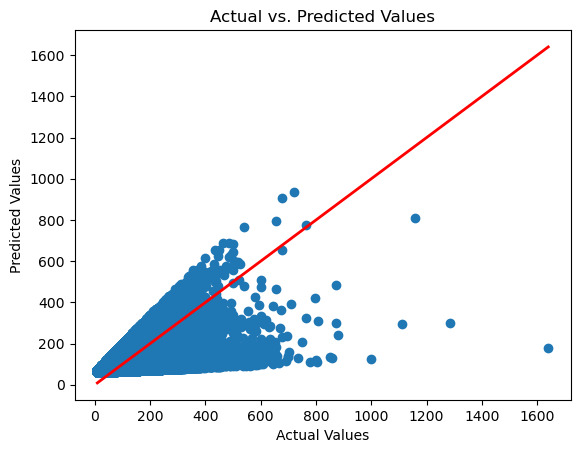

In [29]:
# create a predictive plot
plt.scatter(y_test, y_predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', lw=2) 
plt.xlabel("Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

### NOTE
the line follow more or less the data points, but dont represent the core of the data

In [30]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.94148936e-05]]
Mean squared error:  1402.881235950529
R2 score:  0.20393889485114725


In [31]:
df3.shape

(7449536, 16)

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

df4 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df4.head(30)

,Actual,Predicted
0,65,68.478680
1,82,78.718414
2,168,78.917243
3,107,79.911392
4,119,71.958201
5,50,84.385063
6,161,79.215488
7,55,69.373414
8,44,73.747669
9,142,94.923041


### NOTE
the model  performs relatively  well on some values. others like actual:48	predicted: 81.402616 is twice higher.
overall, it gives reasonably accurate predictions

### Data bias
We had some outliers which can remade and influence the predicitve quality of it.
The model of regression linear is also maybe not the best model for those variables


In [15]:
df3.shape

(7449536, 16)

# Export

In [16]:
# export in pickle
df3.to_pickle(os.path.join(path,'prepared_data', 'transactions_V4'))